# Tutorial 1

Crash course in Julia basics.

## Julia is a calculator:

In [1]:
1 + 2^3

9

In [2]:
sqrt(1 + 2^3) # do `sqrt(ans)` in REPL

3.0

In [3]:
sin(pi)

1.2246467991473532e-16

In [4]:
asin(1 + 3*im)

0.30760364953071123 + 1.8641615441578825im

## Arrays

One dimensional vectors:

In [5]:
v = [3, 5, 7]

3-element Vector{Int64}:
 3
 5
 7

A "row vector" is a 1 x n array:

In [6]:
row = [3 5 7]

1×3 Matrix{Int64}:
 3  5  7

Multiple row vectors separated by semicolons or new lines define matrices:

In [7]:
A = [3 5 7
     2 4 6
     1 3 5]

3×3 Matrix{Int64}:
 3  5  7
 2  4  6
 1  3  5

In [8]:
size(A)

(3, 3)

Accessing elements:

In [9]:
A[1, 2]

5

In [10]:
A[1, 2] == A[2]

false

In [11]:
A[:, 2] # 2nd column

3-element Vector{Int64}:
 5
 4
 3

Changing elements:

In [12]:
A[1, 1] = 42

42

In [13]:
inv(A) # inverse

3×3 Matrix{Float64}:
  0.025641   -0.0512821   0.025641
 -0.0512821   2.60256    -3.05128
  0.025641   -1.55128     2.02564

In [14]:
isapprox(inv(A)*v, A\v) # but RHS more efficient

true

## "Variables" in Julia *point* to objects

Corollary: all passing of function arguments is pass by reference

Like Python; Unlike R, C or FORTRAN.

In [15]:
w = v

w

3-element Vector{Int64}:
 3
 5
 7

In [16]:
v[1] = 42

42

In [17]:
v

3-element Vector{Int64}:
 42
  5
  7

In [18]:
w

3-element Vector{Int64}:
 42
  5
  7

## Tuples

Similar to vectors but of fixed length and immutable (cannot be changed)

In [19]:
t = (1, 2.0, "cat")
typeof(t)

Tuple{Int64, Float64, String}

In [20]:
t[3]

"cat"

## Strings

In [21]:
a_string = "the cat"
a_character = 't'
a_symbol = :t

:t

In [22]:
a_string[1] == a_character

true

A `Symbol` is string-like but
[interned](https://en.wikipedia.org/wiki/String_interning). Generally
use `String` for ordinary textual data, but use `Symbol` for
language reflection (metaprogramming). For example:

In [23]:
isdefined(Main, :z)

false

In [24]:
z = 1 + 2im
isdefined(Main, :z)

false

In [25]:
z.im

2

In [26]:
fieldnames(typeof(z))

(:re, :im)

Symbols are generalized by *expressions*:

In [27]:
ex = :(z == 3)
eval(ex)

false

If this is confusing, forget it for now.

## Dictionaries

In [28]:
d = Dict('a' => "ant", 'z' => "zebra")

Dict{Char, String} with 2 entries:
  'a' => "ant"
  'z' => "zebra"

In [29]:
d['a']

"ant"

In [30]:
d['b'] = "bat"
d

Dict{Char, String} with 3 entries:
  'a' => "ant"
  'z' => "zebra"
  'b' => "bat"

In [31]:
keys(d)

KeySet for a Dict{Char, String} with 3 entries. Keys:
  'a'
  'z'
  'b'

The expression 'a' => "ant" is itself a stand-alone object:

In [32]:
pair = 'a' => "ant"

first(pair)

'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

In [33]:
pairs = [x => x^2 for x in 1:5]

5-element Vector{Pair{Int64, Int64}}:
 1 => 1
 2 => 4
 3 => 9
 4 => 16
 5 => 25

In [34]:
Dict(pairs)

Dict{Int64, Int64} with 5 entries:
  5 => 25
  4 => 16
  2 => 4
  3 => 9
  1 => 1

## Functions

Three ways to define a generic function:

In [35]:
foo(x) = x^2 # METHOD 1 (inline)
foo(3)

9

or

In [36]:
3 |> foo

9

or

In [37]:
3 |> x -> x^2 # METHOD 2 (anonymous)

9

or

In [38]:
function foo2(x) # METHOD 3 (verbose)
    y = x
    z = y
    w = z
    return w^2
end

foo2(3)

9

## Basic iteration

Here are three ways to square the integers from 1 to 10.

METHOD 1 (explicit loop):

In [39]:
squares = [] # or Int[] if performance matters
for x in 1:10
    push!(squares, x^2)
end

squares

10-element Vector{Any}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

METHOD 2 (comprehension):

In [40]:
[x^2 for x in 1:10]

10-element Vector{Int64}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

METHOD 3 (delayed comprension):

In [41]:
squares2 = (x^2 for x in 1:10)

Base.Generator{UnitRange{Int64}, Main.##257.var"#7#8"}(Main.##257.var"#7#8"(), 1:10)

In [42]:
collect(squares2)

10-element Vector{Int64}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

METHOD 4 (map):

In [43]:
map(x -> x^2, 1:10)

10-element Vector{Int64}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

METHOD 5 (broadcasting with dot syntax):

In [44]:
(1:10) .^ 2

10-element Vector{Int64}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

## Loading packages

If not in the REPL:

In [45]:
using Pkg                        # built-in package manager
Pkg.activate("env", shared=true) # create a new pkg env

  Activating environment at `~/.julia/environments/env/Project.toml`


Add some packages to your enviroment (latest compatible versions
added by default):

In [46]:
Pkg.add("Distributions")
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/.julia/environments/env/Project.toml`
  No Changes to `~/.julia/environments/env/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/env/Project.toml`
  No Changes to `~/.julia/environments/env/Manifest.toml`


To load the code for use:

In [47]:
using Distributions
using Plots

N = 1000
samples = rand(Normal(), N);   # equivalent to Julia's built-in `randn(d)`
samples = (samples).^2;        # square element-wise

In [48]:
g = fit(Gamma, samples)

Distributions.Gamma{Float64}(α=0.5177885083538275, θ=1.975827270133122)

In [49]:
@show mean(g) median(g) pdf(g, 1)

mean(g) = 1.0230606549670442
median(g) = 0.4797786963387054
pdf(g, 1) = 0.24735595872421404


0.24735595872421404

## Plotting

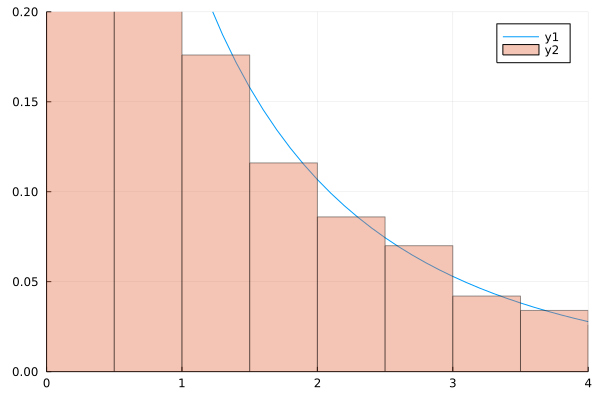

In [50]:
f(x) = pdf(g, x)

x = 0:0.1:4 # floats from 0 to 4 in steps of 0.1
y = f.(x)   # apply f element-wise to x

plot(x, y, xrange=(0,4), yrange=(0,0.2))
histogram!(samples , normalize=true, alpha=0.4)

In [51]:
savefig("my_first_plot.png")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*